In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/shaastra-techathon-ai-ml-challenge-2/sample_submission.csv
/kaggle/input/shaastra-techathon-ai-ml-challenge-2/train.csv
/kaggle/input/shaastra-techathon-ai-ml-challenge-2/test.csv


In [2]:
data=pd.read_csv('/kaggle/input/shaastra-techathon-ai-ml-challenge-2/train.csv')
data


,Unnamed: 0,DATE,LATITUDE_A,LONGITUDE_A,ELEVATION_A,PRCP_A,SNWD_A,TMAX_A,TMIN_A,TAVG_A,...,LONGITUDE_C,ELEVATION_C,PRCP_C,SNWD_C,TMAX_C,TMIN_C,TAVG_C,LATITUDE,LONGITUDE,TAVG
0,0,01-11-1979,63.88,77.52,128,NaN,0.0,17.6,NaN,12.96,...,78.93,64,0.0,0.00,18.7,NaN,NaN,63.933,78.733,9.3
1,1,13-11-1979,63.88,77.52,128,NaN,0.0,8.8,NaN,0.00,...,78.93,64,0.0,0.00,11.0,-3.80,2.04,63.933,78.733,2.7
2,2,05-02-1980,63.88,77.52,128,NaN,0.0,-9.9,NaN,-17.76,...,78.93,64,0.0,0.00,NaN,NaN,-16.56,63.933,78.733,-16.0
3,3,23-12-1979,63.88,77.52,128,0.0,0.0,NaN,-4.30,-4.44,...,78.93,64,0.0,0.00,0.0,NaN,-2.64,63.933,78.733,-3.2
4,4,07-06-1977,63.88,77.52,128,NaN,0.0,39.6,15.48,NaN,...,78.93,64,NaN,3.82,38.5,17.10,33.00,63.933,78.733,27.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,807,26-10-1979,63.88,77.52,128,NaN,0.0,NaN,NaN,15.36,...,78.93,64,0.0,0.00,NaN,NaN,17.76,63.933,78.733,12.7
808,808,06-11-1977,63.88,77.52,128,NaN,0.0,12.1,23.99,10.32,...,78.93,64,0.0,0.00,NaN,3.80,13.44,63.933,78.733,7.8
809,809,30-01-1979,63.88,77.52,128,NaN,0.0,-3.3,-13.76,-11.04,...,78.93,64,0.0,0.00,-1.1,-14.25,-10.80,63.933,78.733,-8.8
810,810,06-10-1979,63.88,77.52,128,0.0,0.0,15.4,NaN,10.80,...,78.93,64,0.0,0.00,15.4,NaN,14.40,63.933,78.733,12.4


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [4]:
data.columns

Index(['Unnamed: 0', 'DATE', 'LATITUDE_A', 'LONGITUDE_A', 'ELEVATION_A',
       'PRCP_A', 'SNWD_A', 'TMAX_A', 'TMIN_A', 'TAVG_A', 'LATITUDE_B',
       'LONGITUDE_B', 'ELEVATION_B', 'PRCP_B', 'SNWD_B', 'TMAX_B', 'TMIN_B',
       'TAVG_B', 'LATITUDE_C', 'LONGITUDE_C', 'ELEVATION_C', 'PRCP_C',
       'SNWD_C', 'TMAX_C', 'TMIN_C', 'TAVG_C', 'LATITUDE', 'LONGITUDE',
       'TAVG'],
      dtype='object')

In [5]:
data.head(10)

,Unnamed: 0,DATE,LATITUDE_A,LONGITUDE_A,ELEVATION_A,PRCP_A,SNWD_A,TMAX_A,TMIN_A,TAVG_A,...,LONGITUDE_C,ELEVATION_C,PRCP_C,SNWD_C,TMAX_C,TMIN_C,TAVG_C,LATITUDE,LONGITUDE,TAVG
0,0,01-11-1979,63.88,77.52,128,NaN,0.0,17.6,NaN,12.96,...,78.93,64,0.0,0.00,18.7,NaN,NaN,63.933,78.733,9.3
1,1,13-11-1979,63.88,77.52,128,NaN,0.0,8.8,NaN,0.00,...,78.93,64,0.0,0.00,11.0,-3.80,2.04,63.933,78.733,2.7
2,2,05-02-1980,63.88,77.52,128,NaN,0.0,-9.9,NaN,-17.76,...,78.93,64,0.0,0.00,NaN,NaN,-16.56,63.933,78.733,-16.0
3,3,23-12-1979,63.88,77.52,128,0.0,0.0,NaN,-4.30,-4.44,...,78.93,64,0.0,0.00,0.0,NaN,-2.64,63.933,78.733,-3.2
4,4,07-06-1977,63.88,77.52,128,NaN,0.0,39.6,15.48,NaN,...,78.93,64,NaN,3.82,38.5,17.10,33.00,63.933,78.733,27.3
5,5,03-12-1978,63.88,77.52,128,NaN,0.0,NaN,NaN,NaN,...,78.93,64,0.0,0.00,11.0,NaN,6.48,63.933,78.733,3.8
6,6,05-01-1980,63.88,77.52,128,NaN,0.0,-4.4,NaN,-5.76,...,78.93,64,3.0,3.25,-2.2,-2.85,-3.24,63.933,78.733,-2.6
7,7,04-12-1976,63.88,77.52,128,0.0,0.0,1.1,NaN,18.72,...,78.93,64,0.0,0.00,3.3,NaN,-3.96,63.933,78.733,-1.2
8,8,12-04-1978,63.88,77.52,128,NaN,0.0,NaN,18.40,7.20,...,78.93,64,NaN,0.00,16.5,NaN,NaN,63.933,78.733,5.5
9,9,21-11-1976,63.88,77.52,128,NaN,0.0,6.6,NaN,-2.16,...,78.93,64,0.0,0.00,5.5,NaN,-1.92,63.933,78.733,-1.0


In [6]:
data['PRCP_A'].unique()

array([ nan,   0.,  10.,   3.,  89.,  15.,   5., 119.,  61.,  30.,  51.,
        20., 180., 500.,  41., 239.])

In [7]:
data=data.drop(['Unnamed: 0','LATITUDE','LONGITUDE','LATITUDE_A','LONGITUDE_A','ELEVATION_A','LATITUDE_B','LONGITUDE_B','ELEVATION_B','LATITUDE_C','LONGITUDE_C','ELEVATION_C'],axis=1)

In [8]:
data.head(10)

,DATE,PRCP_A,SNWD_A,TMAX_A,TMIN_A,TAVG_A,PRCP_B,SNWD_B,TMAX_B,TMIN_B,TAVG_B,PRCP_C,SNWD_C,TMAX_C,TMIN_C,TAVG_C,TAVG
0,01-11-1979,NaN,0.0,17.6,NaN,12.96,0,3.93,17.12,29.84,9.90,0.0,0.00,18.7,NaN,NaN,9.3
1,13-11-1979,NaN,0.0,8.8,NaN,0.00,0,0.00,10.49,-4.64,1.10,0.0,0.00,11.0,-3.80,2.04,2.7
2,05-02-1980,NaN,0.0,-9.9,NaN,-17.76,0,0.00,-9.31,-17.52,-17.60,0.0,0.00,NaN,NaN,-16.56,-16.0
3,23-12-1979,0.0,0.0,NaN,-4.30,-4.44,3,0.00,0.64,-3.20,-2.75,0.0,0.00,0.0,NaN,-2.64,-3.2
4,07-06-1977,NaN,0.0,39.6,15.48,NaN,0,0.00,38.31,13.36,29.48,NaN,3.82,38.5,17.10,33.00,27.3
5,03-12-1978,NaN,0.0,NaN,NaN,NaN,0,0.00,8.56,2.88,6.16,0.0,0.00,11.0,NaN,6.48,3.8
6,05-01-1980,NaN,0.0,-4.4,NaN,-5.76,0,0.00,-1.82,13.52,-2.53,3.0,3.25,-2.2,-2.85,-3.24,-2.6
7,04-12-1976,0.0,0.0,1.1,NaN,18.72,0,0.00,3.96,-7.92,-4.40,0.0,0.00,3.3,NaN,-3.96,-1.2
8,12-04-1978,NaN,0.0,NaN,18.40,7.20,0,0.00,14.55,-0.72,8.80,NaN,0.00,16.5,NaN,NaN,5.5
9,21-11-1976,NaN,0.0,6.6,NaN,-2.16,0,0.00,7.06,-7.76,35.31,0.0,0.00,5.5,NaN,-1.92,-1.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    812 non-null    object 
 1   PRCP_A  251 non-null    float64
 2   SNWD_A  812 non-null    float64
 3   TMAX_A  567 non-null    float64
 4   TMIN_A  289 non-null    float64
 5   TAVG_A  742 non-null    float64
 6   PRCP_B  812 non-null    int64  
 7   SNWD_B  812 non-null    float64
 8   TMAX_B  812 non-null    float64
 9   TMIN_B  812 non-null    float64
 10  TAVG_B  742 non-null    float64
 11  PRCP_C  605 non-null    float64
 12  SNWD_C  812 non-null    float64
 13  TMAX_C  573 non-null    float64
 14  TMIN_C  341 non-null    float64
 15  TAVG_C  683 non-null    float64
 16  TAVG    812 non-null    float64
dtypes: float64(15), int64(1), object(1)
memory usage: 108.0+ KB


In [10]:
data["DATE"].unique()    #  dtype=object(DataType is object which is a categorical value not a numerical value) to a int64 or float64

array(['01-11-1979', '13-11-1979', '05-02-1980', '23-12-1979',
       '07-06-1977', '03-12-1978', '05-01-1980', '04-12-1976',
       '12-04-1978', '21-11-1976', '25-10-1978', '15-03-1980',
       '02-09-1977', '31-07-1980', '23-04-1977', '03-01-1980',
       '25-03-1978', '24-09-1978', '30-06-1979', '05-04-1978',
       '12-04-1979', '31-03-1976', '28-12-1975', '28-09-1978',
       '22-11-1976', '16-12-1976', '19-02-1979', '11-08-1979',
       '17-12-1976', '23-11-1979', '04-04-1977', '18-06-1976',
       '23-08-1978', '31-01-1979', '14-10-1977', '09-01-1978',
       '07-10-1978', '17-03-1980', '11-11-1975', '20-12-1979',
       '01-02-1977', '07-04-1979', '05-12-1978', '30-07-1980',
       '07-12-1975', '21-12-1975', '28-03-1975', '12-07-1976',
       '02-05-1979', '29-11-1978', '08-07-1979', '02-06-1980',
       '01-05-1979', '12-02-1980', '23-02-1977', '23-02-1978',
       '08-01-1980', '17-07-1977', '10-04-1979', '18-07-1978',
       '13-09-1976', '28-02-1977', '09-04-1979', '27-10

In [11]:
print(data['DATE'].head())

0    01-11-1979
1    13-11-1979
2    05-02-1980
3    23-12-1979
4    07-06-1977
Name: DATE, dtype: object


In [12]:
unique_dates_count = data['DATE'].nunique()
print(f"Number of unique dates: {unique_dates_count}")


Number of unique dates: 812


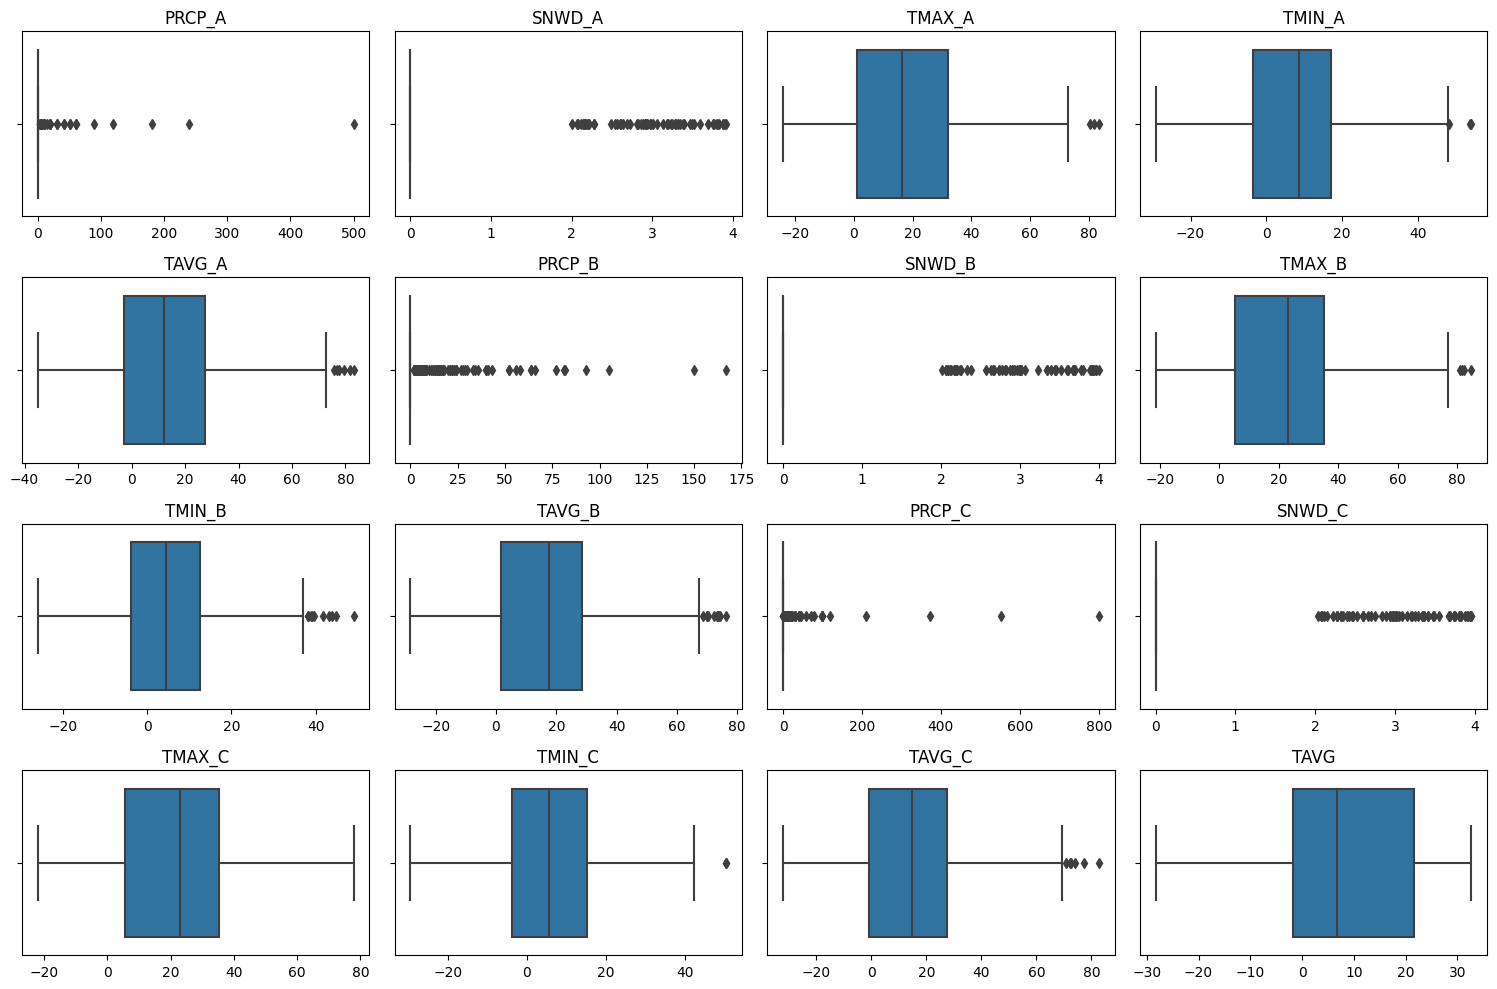

In [13]:
# Plot box plots for each feature
plt.figure(figsize=(15, 10))
X=data.drop(['DATE'],axis=1)
features=X.columns
for i, feature in enumerate(features):
    plt.subplot(4, 4, i + 1)  # Adjust the number of rows and columns based on the number of features
    sns.boxplot(x=X[feature])
    plt.title(feature)
    plt.xlabel('')

plt.tight_layout()
plt.show()


In [14]:
data['DATE'] = pd.to_datetime(data['DATE'], format='%d-%m-%Y')


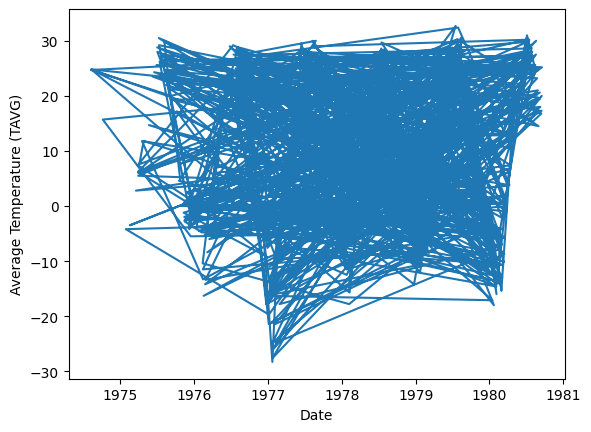

In [15]:
import matplotlib.pyplot as plt
plt.plot(data['DATE'], data['TAVG'])
plt.xlabel('Date')
plt.ylabel('Average Temperature (TAVG)')
plt.show()


In [16]:
#BRUH ALL RAAANNNNDOOMM PLOTS, NO TRENDS IN SEASONS BRAAAHHHHH  :( sed life

In [17]:
data=data.drop(['DATE'],axis=1)

In [18]:
#IMMA check one more time !!!!!
data.head(10)

,PRCP_A,SNWD_A,TMAX_A,TMIN_A,TAVG_A,PRCP_B,SNWD_B,TMAX_B,TMIN_B,TAVG_B,PRCP_C,SNWD_C,TMAX_C,TMIN_C,TAVG_C,TAVG
0,NaN,0.0,17.6,NaN,12.96,0,3.93,17.12,29.84,9.90,0.0,0.00,18.7,NaN,NaN,9.3
1,NaN,0.0,8.8,NaN,0.00,0,0.00,10.49,-4.64,1.10,0.0,0.00,11.0,-3.80,2.04,2.7
2,NaN,0.0,-9.9,NaN,-17.76,0,0.00,-9.31,-17.52,-17.60,0.0,0.00,NaN,NaN,-16.56,-16.0
3,0.0,0.0,NaN,-4.30,-4.44,3,0.00,0.64,-3.20,-2.75,0.0,0.00,0.0,NaN,-2.64,-3.2
4,NaN,0.0,39.6,15.48,NaN,0,0.00,38.31,13.36,29.48,NaN,3.82,38.5,17.10,33.00,27.3
5,NaN,0.0,NaN,NaN,NaN,0,0.00,8.56,2.88,6.16,0.0,0.00,11.0,NaN,6.48,3.8
6,NaN,0.0,-4.4,NaN,-5.76,0,0.00,-1.82,13.52,-2.53,3.0,3.25,-2.2,-2.85,-3.24,-2.6
7,0.0,0.0,1.1,NaN,18.72,0,0.00,3.96,-7.92,-4.40,0.0,0.00,3.3,NaN,-3.96,-1.2
8,NaN,0.0,NaN,18.40,7.20,0,0.00,14.55,-0.72,8.80,NaN,0.00,16.5,NaN,NaN,5.5
9,NaN,0.0,6.6,NaN,-2.16,0,0.00,7.06,-7.76,35.31,0.0,0.00,5.5,NaN,-1.92,-1.0


In [19]:
data.tail(10)

,PRCP_A,SNWD_A,TMAX_A,TMIN_A,TAVG_A,PRCP_B,SNWD_B,TMAX_B,TMIN_B,TAVG_B,PRCP_C,SNWD_C,TMAX_C,TMIN_C,TAVG_C,TAVG
802,NaN,3.76,NaN,0.00,2.40,0,0.00,7.92,-2.80,1.32,0.0,0.0,NaN,NaN,3.84,1.0
803,NaN,2.00,26.4,NaN,22.08,77,0.00,24.50,12.80,60.50,41.0,0.0,22.00,15.20,21.84,19.7
804,NaN,0.00,NaN,NaN,36.84,0,0.00,40.66,19.68,34.54,0.0,0.0,70.95,NaN,37.44,27.5
805,NaN,0.00,40.7,16.34,NaN,0,3.68,39.59,14.96,54.78,0.0,0.0,41.80,18.05,31.92,25.2
806,NaN,0.00,NaN,NaN,NaN,0,0.00,10.81,2.48,7.26,10.0,0.0,NaN,NaN,9.84,7.3
807,NaN,0.00,NaN,NaN,15.36,0,0.00,21.40,9.52,43.56,0.0,0.0,NaN,NaN,17.76,12.7
808,NaN,0.00,12.1,23.99,10.32,0,3.97,18.19,4.40,12.21,0.0,0.0,NaN,3.80,13.44,7.8
809,NaN,0.00,-3.3,-13.76,-11.04,0,0.00,-2.03,-13.92,27.17,0.0,0.0,-1.10,-14.25,-10.80,-8.8
810,0.0,0.00,15.4,NaN,10.80,0,0.00,15.41,7.20,13.31,0.0,0.0,15.40,NaN,14.40,12.4
811,NaN,0.00,-2.2,NaN,-9.36,0,0.00,0.00,-9.44,-7.48,0.0,0.0,1.10,NaN,-5.64,-6.8


In [20]:
#NICE

In [21]:
#Missing Data Analysis
# MDA cell 00

In [22]:
# MDA cell 1
# Check for missing values
missing_values = data.isnull().sum()

# Calculate the percentage of missing data in each column
missing_percentage = (missing_values / len(data)) * 100

# Display the missing data statistics
print("Missing Values in Each Column:\n", missing_values)
print("\nPercentage of Missing Data:\n", missing_percentage)

Missing Values in Each Column:
 PRCP_A    561
SNWD_A      0
TMAX_A    245
TMIN_A    523
TAVG_A     70
PRCP_B      0
SNWD_B      0
TMAX_B      0
TMIN_B      0
TAVG_B     70
PRCP_C    207
SNWD_C      0
TMAX_C    239
TMIN_C    471
TAVG_C    129
TAVG        0
dtype: int64

Percentage of Missing Data:
 PRCP_A    69.088670
SNWD_A     0.000000
TMAX_A    30.172414
TMIN_A    64.408867
TAVG_A     8.620690
PRCP_B     0.000000
SNWD_B     0.000000
TMAX_B     0.000000
TMIN_B     0.000000
TAVG_B     8.620690
PRCP_C    25.492611
SNWD_C     0.000000
TMAX_C    29.433498
TMIN_C    58.004926
TAVG_C    15.886700
TAVG       0.000000
dtype: float64


In [23]:
# MDA cell 2
# Remove rows with missing values
data_cleaned = data.dropna()

# Verify that missing values have been removed
print("\nMissing values in each column after removal:")
print(data_cleaned.isnull().sum())


# This is a ideal case scnario, i think imputation(calcluting using algo/model from lib on how to fill missing[NaN/Unknown] values) is required since the value is made with respect to real world . 


Missing values in each column after removal:
PRCP_A    0
SNWD_A    0
TMAX_A    0
TMIN_A    0
TAVG_A    0
PRCP_B    0
SNWD_B    0
TMAX_B    0
TMIN_B    0
TAVG_B    0
PRCP_C    0
SNWD_C    0
TMAX_C    0
TMIN_C    0
TAVG_C    0
TAVG      0
dtype: int64


In [24]:
data_cleaned.tail(10)

,PRCP_A,SNWD_A,TMAX_A,TMIN_A,TAVG_A,PRCP_B,SNWD_B,TMAX_B,TMIN_B,TAVG_B,PRCP_C,SNWD_C,TMAX_C,TMIN_C,TAVG_C,TAVG
366,0.0,0.00,38.50,17.20,33.72,0,0.0,37.88,14.08,30.14,0.0,0.00,39.60,17.10,32.76,27.7
379,0.0,0.00,-4.40,-12.04,-8.28,0,0.0,-2.25,-10.88,-9.24,0.0,0.00,1.10,-14.25,-9.60,-7.2
482,0.0,0.00,22.11,-11.18,16.20,0,0.0,0.64,-8.88,25.74,0.0,0.00,26.62,12.06,-6.00,-3.0
555,0.0,0.00,5.50,-9.46,-2.76,0,0.0,10.49,-4.72,0.66,0.0,0.00,9.90,-6.65,-1.20,-4.5
621,0.0,0.00,39.60,18.06,29.16,0,0.0,40.77,16.32,32.23,0.0,0.00,71.94,20.90,33.60,25.8
681,0.0,0.00,34.10,31.48,26.88,0,0.0,34.88,13.04,27.39,0.0,0.00,35.20,17.10,30.84,22.2
712,0.0,0.00,26.40,7.74,16.20,0,0.0,54.36,11.76,22.44,0.0,0.00,67.54,12.35,23.40,15.3
759,0.0,0.00,34.10,34.74,28.56,0,0.0,31.67,11.04,55.44,0.0,0.00,33.00,14.25,27.12,23.2
794,0.0,0.00,-5.50,-17.20,-13.80,0,0.0,1.82,-10.80,-7.92,0.0,2.98,1.10,-15.20,-9.24,-11.0
801,0.0,2.18,-11.00,-18.06,-18.84,0,0.0,-4.28,-12.24,-11.44,0.0,0.00,2.20,-14.25,-12.00,-11.3


In [25]:
data.describe()

,PRCP_A,SNWD_A,TMAX_A,TMIN_A,TAVG_A,PRCP_B,SNWD_B,TMAX_B,TMIN_B,TAVG_B,PRCP_C,SNWD_C,TMAX_C,TMIN_C,TAVG_C,TAVG
count,251.000000,812.000000,567.000000,289.000000,742.000000,812.000000,812.000000,812.000000,812.000000,742.000000,605.000000,812.000000,573.000000,341.000000,683.000000,812.000000
mean,6.633466,0.215961,17.127795,8.385779,12.793423,2.736453,0.225394,21.907771,4.364138,17.801173,5.641322,0.242537,22.335951,5.001261,14.354319,8.590764
std,38.496768,0.787311,18.738273,15.991607,20.119547,12.693659,0.809978,18.882384,11.509807,19.958284,44.477935,0.839384,19.397302,13.750962,18.992756,13.549444
min,0.000000,0.000000,-24.200000,-29.240000,-35.040000,0.000000,0.000000,-21.400000,-25.920000,-28.380000,0.000000,0.000000,-22.000000,-29.450000,-32.160000,-28.300000
25%,0.000000,0.000000,1.100000,-3.440000,-3.000000,0.000000,0.000000,5.350000,-3.840000,1.705000,0.000000,0.000000,5.500000,-3.800000,-0.960000,-1.725000
50%,0.000000,0.000000,16.500000,8.600000,12.180000,0.000000,0.000000,23.165000,4.400000,17.710000,0.000000,0.000000,23.100000,5.700000,14.640000,6.800000
75%,0.000000,0.000000,31.900000,17.200000,27.600000,0.000000,0.000000,35.310000,12.560000,28.490000,0.000000,0.000000,35.200000,15.200000,27.360000,21.600000
max,500.000000,3.920000,83.490000,54.180000,83.040000,167.000000,4.000000,84.850000,48.960000,76.340000,800.000000,3.960000,77.880000,50.440000,82.680000,32.700000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


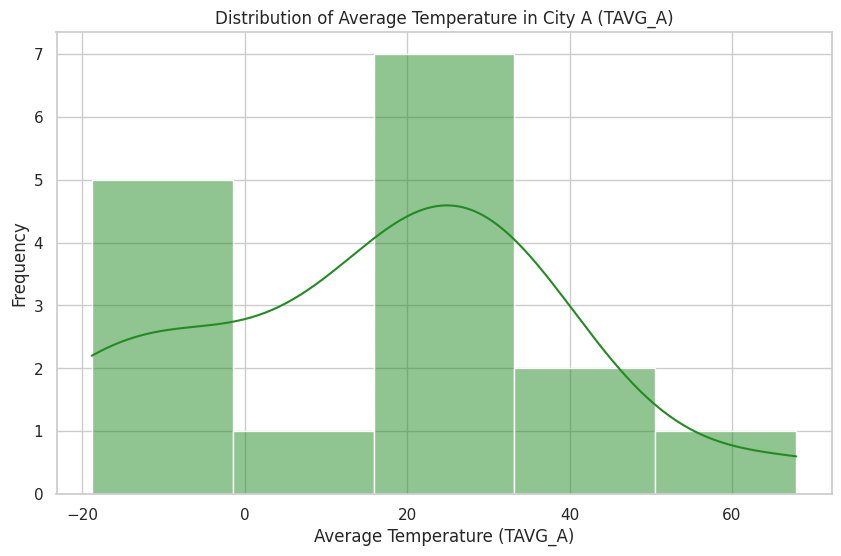

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


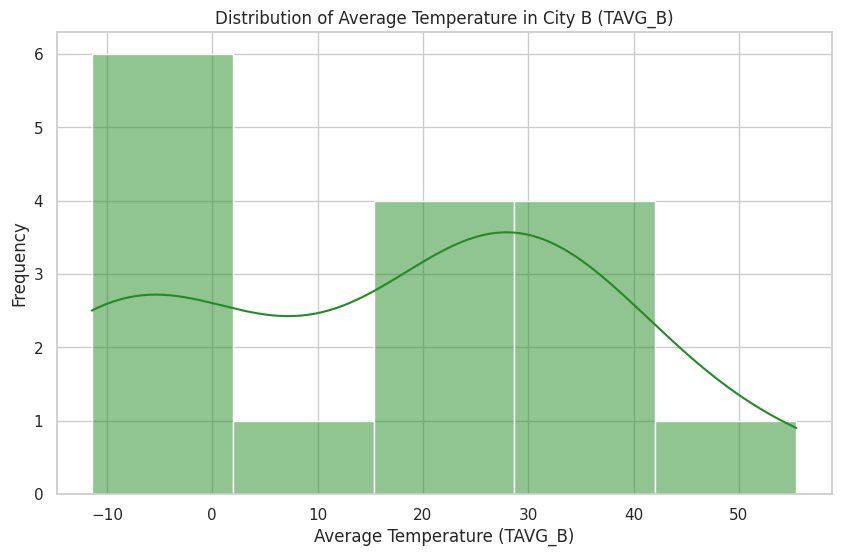

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


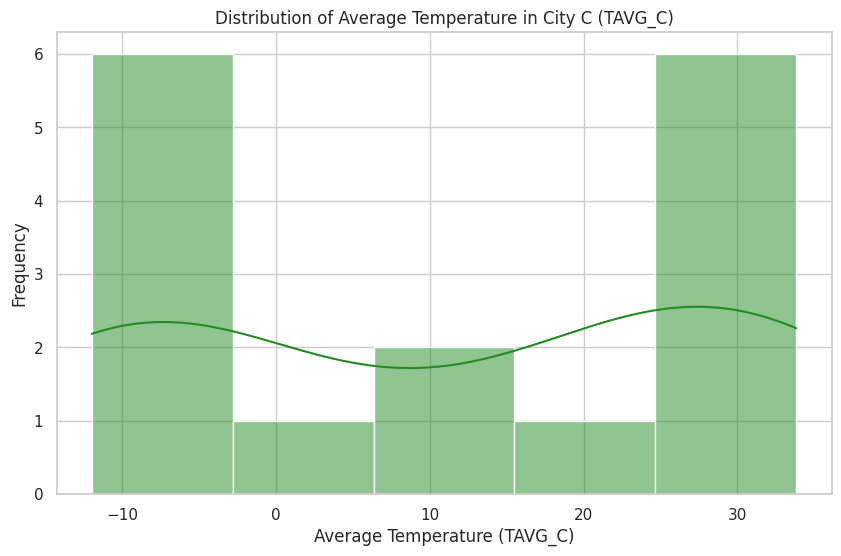

In [26]:

#PLOT

# Plot for TAVG_A
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['TAVG_A'], color='forestgreen', kde=True)
plt.title('Distribution of Average Temperature in City A (TAVG_A)')
plt.xlabel('Average Temperature (TAVG_A)')
plt.ylabel('Frequency')
plt.show()

# Plot for TAVG_B
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['TAVG_B'], color='forestgreen', kde=True)
plt.title('Distribution of Average Temperature in City B (TAVG_B)')
plt.xlabel('Average Temperature (TAVG_B)')
plt.ylabel('Frequency')
plt.show()

# Plot for TAVG_C
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['TAVG_C'], color='forestgreen', kde=True)
plt.title('Distribution of Average Temperature in City C (TAVG_C)')
plt.xlabel('Average Temperature (TAVG_C)')
plt.ylabel('Frequency')
plt.show()



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


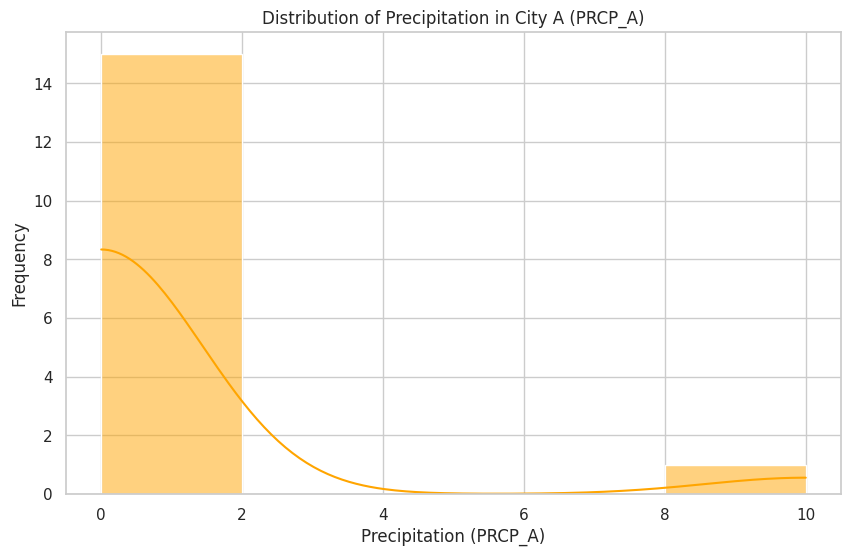

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


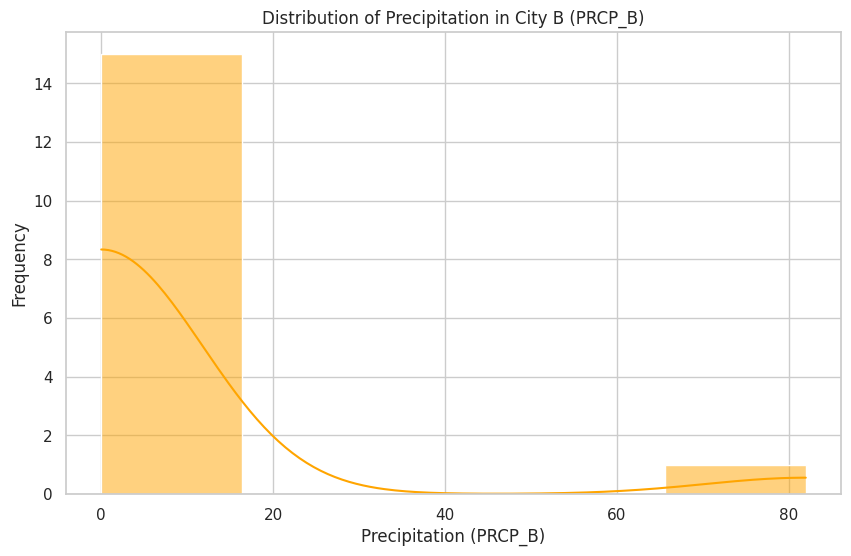

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


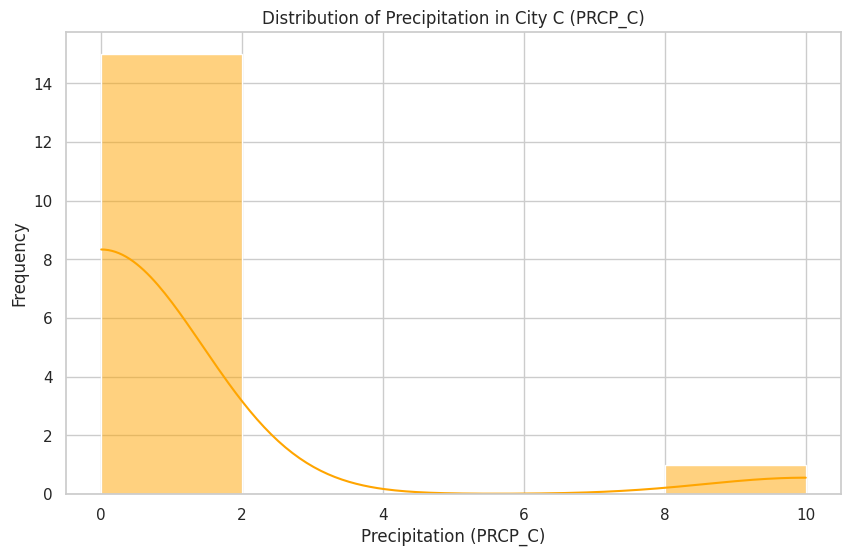

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


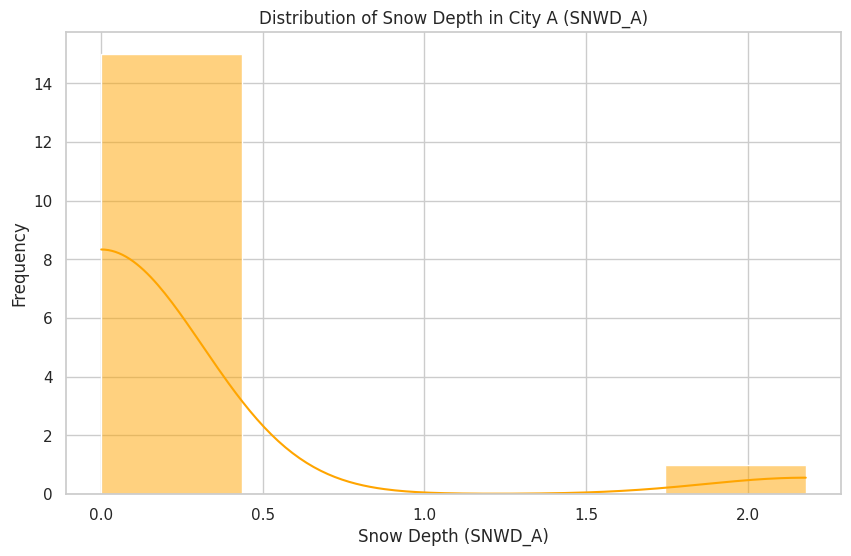

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


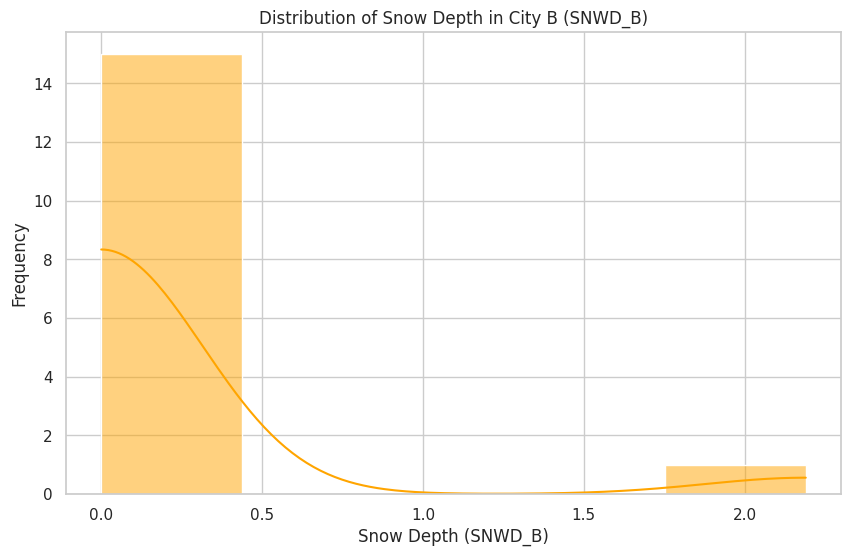

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


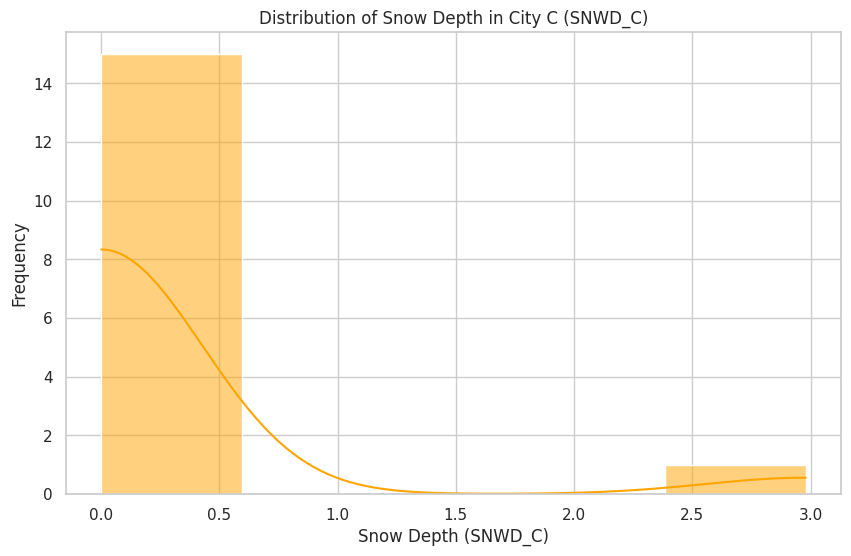

In [27]:
# Plot for PRCP_A
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['PRCP_A'], color='orange', kde=True)
plt.title('Distribution of Precipitation in City A (PRCP_A)')
plt.xlabel('Precipitation (PRCP_A)')
plt.ylabel('Frequency')
plt.show()


# Plot for PRCP_B
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['PRCP_B'], color='orange', kde=True)
plt.title('Distribution of Precipitation in City B (PRCP_B)')
plt.xlabel('Precipitation (PRCP_B)')
plt.ylabel('Frequency')
plt.show()



# Plot for PRCP_A
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['PRCP_C'], color='orange', kde=True)
plt.title('Distribution of Precipitation in City C (PRCP_C)')
plt.xlabel('Precipitation (PRCP_C)')
plt.ylabel('Frequency')
plt.show()

# Plot for SNWD_A
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['SNWD_A'], color='orange', kde=True)
plt.title('Distribution of Snow Depth in City A (SNWD_A)')
plt.xlabel('Snow Depth (SNWD_A)')
plt.ylabel('Frequency')
plt.show()


# Plot for SNWD_B
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['SNWD_B'], color='orange', kde=True)
plt.title('Distribution of Snow Depth in City B (SNWD_B)')
plt.xlabel('Snow Depth (SNWD_B)')
plt.ylabel('Frequency')
plt.show()



# Plot for SNWD_A
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['SNWD_C'], color='orange', kde=True)
plt.title('Distribution of Snow Depth in City C (SNWD_C)')
plt.xlabel('Snow Depth (SNWD_C)')
plt.ylabel('Frequency')
plt.show()

# Similarly, you can create plots for `PRCP_B`, `SNWD_B`, `PRCP_C`, `SNWD_C`, etc...


In [28]:
data_cleaned.tail(10)

,PRCP_A,SNWD_A,TMAX_A,TMIN_A,TAVG_A,PRCP_B,SNWD_B,TMAX_B,TMIN_B,TAVG_B,PRCP_C,SNWD_C,TMAX_C,TMIN_C,TAVG_C,TAVG
366,0.0,0.00,38.50,17.20,33.72,0,0.0,37.88,14.08,30.14,0.0,0.00,39.60,17.10,32.76,27.7
379,0.0,0.00,-4.40,-12.04,-8.28,0,0.0,-2.25,-10.88,-9.24,0.0,0.00,1.10,-14.25,-9.60,-7.2
482,0.0,0.00,22.11,-11.18,16.20,0,0.0,0.64,-8.88,25.74,0.0,0.00,26.62,12.06,-6.00,-3.0
555,0.0,0.00,5.50,-9.46,-2.76,0,0.0,10.49,-4.72,0.66,0.0,0.00,9.90,-6.65,-1.20,-4.5
621,0.0,0.00,39.60,18.06,29.16,0,0.0,40.77,16.32,32.23,0.0,0.00,71.94,20.90,33.60,25.8
681,0.0,0.00,34.10,31.48,26.88,0,0.0,34.88,13.04,27.39,0.0,0.00,35.20,17.10,30.84,22.2
712,0.0,0.00,26.40,7.74,16.20,0,0.0,54.36,11.76,22.44,0.0,0.00,67.54,12.35,23.40,15.3
759,0.0,0.00,34.10,34.74,28.56,0,0.0,31.67,11.04,55.44,0.0,0.00,33.00,14.25,27.12,23.2
794,0.0,0.00,-5.50,-17.20,-13.80,0,0.0,1.82,-10.80,-7.92,0.0,2.98,1.10,-15.20,-9.24,-11.0
801,0.0,2.18,-11.00,-18.06,-18.84,0,0.0,-4.28,-12.24,-11.44,0.0,0.00,2.20,-14.25,-12.00,-11.3


In [29]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Define which columns require which imputation strategy
numerical_features = data_cleaned.columns  # Example numerical features
categorical_features = []  # Example categorical features
feature_labels = data_cleaned.columns.tolist()

# Create transformers
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = SimpleImputer(strategy='most_frequent')

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numerical_features),('cat', categorical_transformer, categorical_features)])

# Apply transformations
df_imputed = preprocessor.fit_transform(data_cleaned) 
data_cleaned = pd.DataFrame(df_imputed, columns=feature_labels)  #df = pd.DataFrame(df_imputed, columns=df.columns) changed to df = pd.DataFrame(df_imputed, columns=feature_labels)

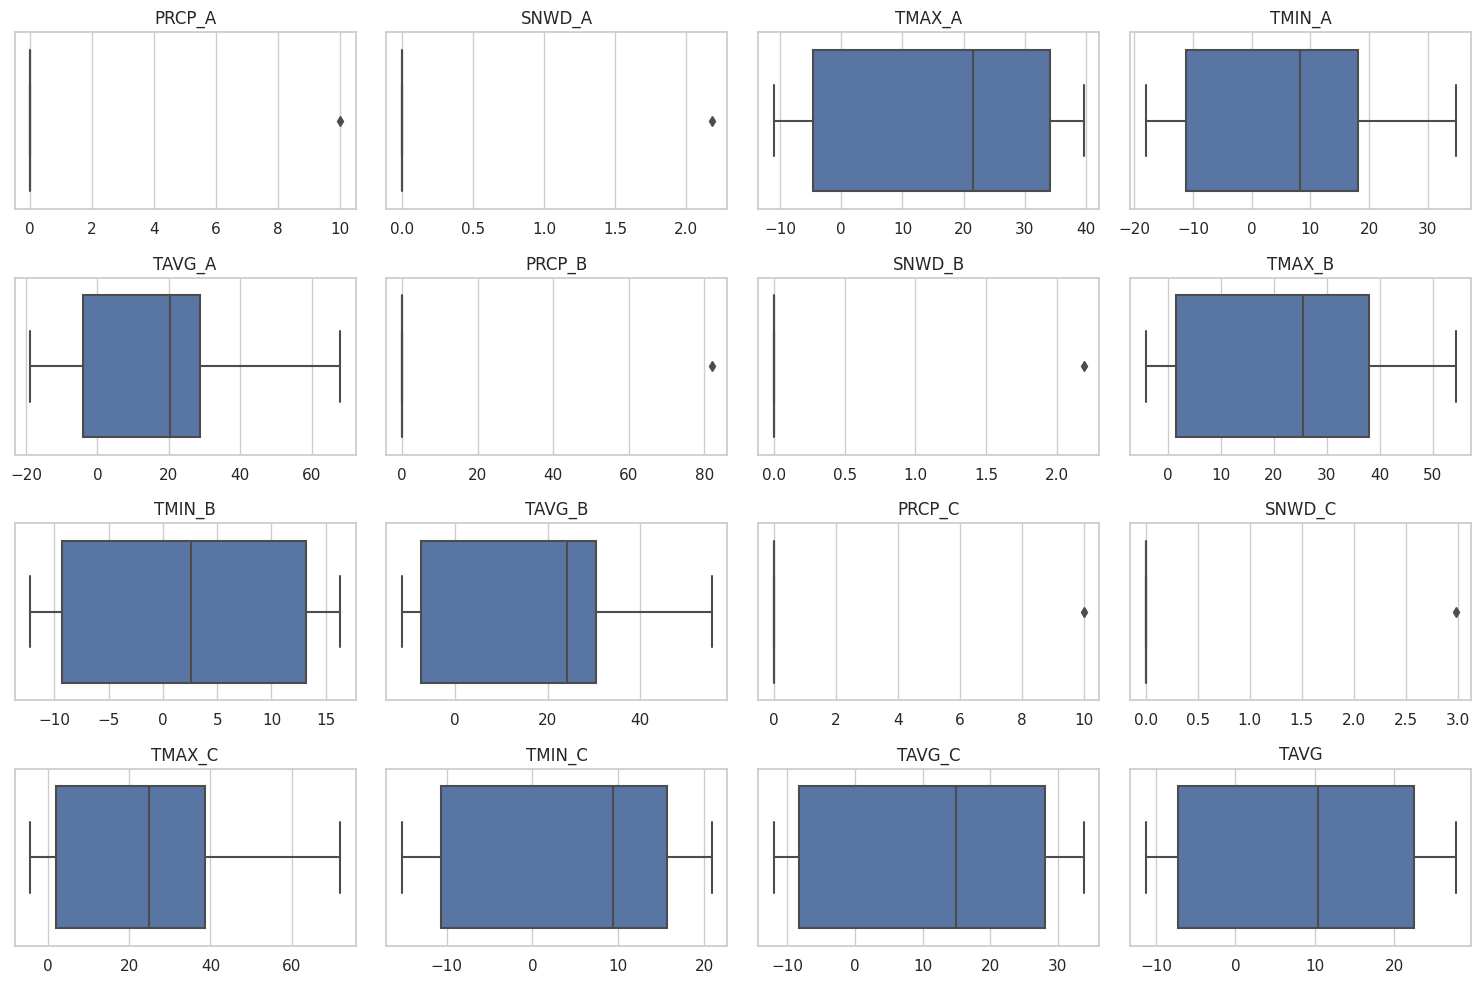

In [30]:
# Plot box plots for each feature

plt.figure(figsize=(15, 10))
X=data_cleaned
features=X.columns
for i, feature in enumerate(features):
    plt.subplot(4, 4, i + 1)  # Adjust the number of rows and columns based on the number of features
    sns.boxplot(x=X[feature])
    plt.title(feature)
    plt.xlabel('')

plt.tight_layout()
plt.show()

In [31]:
# Calculate IQR and outlier bounds
Q1 = data_cleaned['PRCP_A'].quantile(0.25)
Q3 = data_cleaned['PRCP_A'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data_cleaned[data_cleaned['PRCP_A'] > upper_bound]
print(f"Number of outliers: {outliers.shape[0]}")
print(f"Outlier values:\n{outliers['PRCP_A'].sort_values(ascending=False)}")

Number of outliers: 1
Outlier values:
1    10.0
Name: PRCP_A, dtype: float64


In [32]:
def remove_outliers(df):
    df_clean = data_cleaned.copy()
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    
    for column in numeric_columns:
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define the outlier thresholds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove outliers
        df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]
    
    return df_clean
df_numeric = data_cleaned.select_dtypes(include=[np.number])
# Remove outliers from the DataFrame
df_no_outliers = remove_outliers(df_numeric)

# Print the cleaned DataFrame
print("DataFrame after removing outliers:")

df_no_outliers.head()

DataFrame after removing outliers:


,PRCP_A,SNWD_A,TMAX_A,TMIN_A,TAVG_A,PRCP_B,SNWD_B,TMAX_B,TMIN_B,TAVG_B,PRCP_C,SNWD_C,TMAX_C,TMIN_C,TAVG_C,TAVG
0,0.0,0.0,33.0,12.90,24.36,0.0,0.0,38.31,13.52,27.83,0.0,0.0,38.5,15.20,27.00,21.6
2,0.0,0.0,38.5,18.06,67.92,0.0,0.0,39.06,15.60,31.02,0.0,0.0,39.6,20.90,33.84,27.0
4,0.0,0.0,-6.6,-11.18,28.68,0.0,0.0,28.89,-9.28,-7.15,0.0,0.0,0.0,-10.45,-7.92,-7.2
5,0.0,0.0,-11.0,8.60,-18.12,0.0,0.0,-4.28,-9.28,-9.13,0.0,0.0,-4.4,-11.40,-11.76,-11.0
6,0.0,0.0,38.5,17.20,33.72,0.0,0.0,37.88,14.08,30.14,0.0,0.0,39.6,17.10,32.76,27.7


In [33]:
# df.head()

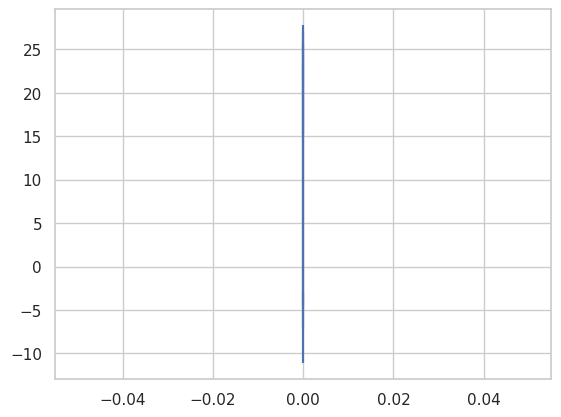

In [34]:
plt.plot(df_no_outliers.PRCP_A,df_no_outliers.TAVG)

In [35]:
# # Check for missing values in each column
# missing_counts = df.isnull().sum()
# print("Missing values in each column:")
# print(missing_counts)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_no_outliers.drop(['TAVG'],axis=1), df_no_outliers['TAVG'], test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 43.86175305310121
R^2 Score: -3.503260067053513


In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = model_rf.predict(X_test)

# Evaluate the RandomForestRegressor
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor Mean Squared Error: {mse_rf}")
print(f"Random Forest Regressor R^2 Score: {r2_rf}")

Random Forest Regressor Mean Squared Error: 1.9690019999999635
Random Forest Regressor R^2 Score: 0.7978437371663282


In [38]:
from sklearn.linear_model import HuberRegressor

# Initialize and train Huber Regressor
model_huber = HuberRegressor(max_iter=1000)
model_huber.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_huber = model_huber.predict(X_test)
mse_huber = mean_squared_error(y_test, y_pred_huber)
r2_huber = r2_score(y_test, y_pred_huber)

print(f"Huber Regressor Mean Squared Error: {mse_huber}")
print(f"Huber Regressor R^2 Score: {r2_huber}")

Huber Regressor Mean Squared Error: 31.247700920391935
Huber Regressor R^2 Score: -2.208182846036133


In [39]:
#RF is giving the best result?

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


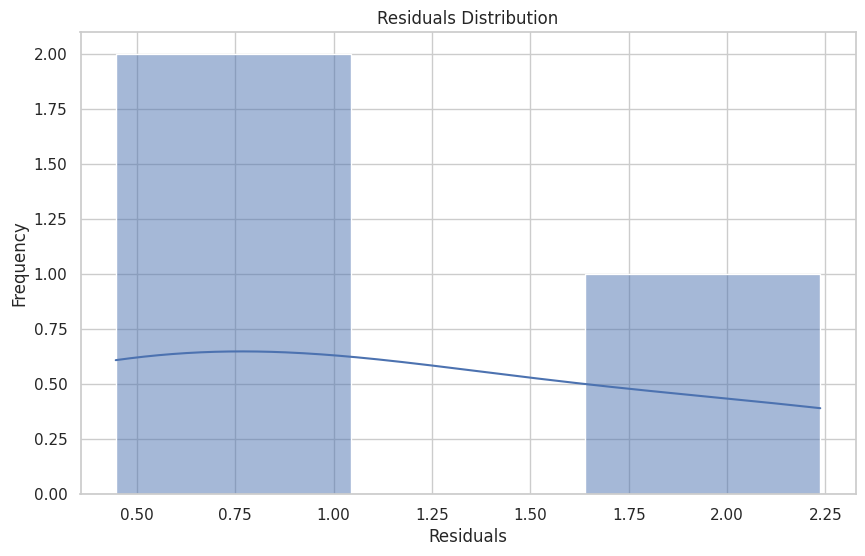

In [40]:
residuals = y_test - y_pred_rf
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [41]:
# Feature importances
importances = model_rf.feature_importances_
feature_names = df_no_outliers.drop(['TAVG'],axis=1).columns
sorted_indices = np.argsort(importances)[::-1]

# Print feature importances
print("Feature importances:")
for i in sorted_indices:
    print(f"{feature_names[i]}: {importances[i]}")

Feature importances:
TAVG_B: 0.14108418665528893
TMAX_C: 0.1383352950575525
TMAX_B: 0.1296809001367648
TAVG_C: 0.12235317814582292
TMIN_B: 0.11878303380937559
TMIN_A: 0.11091160364614808
TMIN_C: 0.10019397277295078
TMAX_A: 0.08874333664400197
TAVG_A: 0.0499144931320944
SNWD_C: 0.0
PRCP_C: 0.0
SNWD_B: 0.0
PRCP_B: 0.0
SNWD_A: 0.0
PRCP_A: 0.0


In [42]:
# Remove features with zero importance
important_features = df_no_outliers.drop(['TAVG'],axis=1).columns[model_rf.feature_importances_ > 0]
X_reduced = df_no_outliers.drop(['TAVG'],axis=1)[important_features]

In [43]:
# Split data with reduced features
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, df_no_outliers['TAVG'], test_size=0.2, random_state=42)

# Retrain model
model_rf_reduced = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf_reduced.fit(X_train_reduced, y_train)

# Evaluate the model
y_pred_rf_reduced = model_rf_reduced.predict(X_test_reduced)
mse_rf_reduced = mean_squared_error(y_test, y_pred_rf_reduced)
r2_rf_reduced = r2_score(y_test, y_pred_rf_reduced)

print(f"Reduced Features Random Forest Regressor Mean Squared Error: {mse_rf_reduced}")
print(f"Reduced Features Random Forest Regressor R^2 Score: {r2_rf_reduced}")

Reduced Features Random Forest Regressor Mean Squared Error: 2.6379286666666544
Reduced Features Random Forest Regressor R^2 Score: 0.7291654346338137


In [44]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_rf_reduced, X_reduced,df_no_outliers['TAVG'], cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE: {-scores.mean()}")

Cross-validated MSE: 25.810967433333314


In [45]:
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Best Model Mean Squared Error: {mse_best}")
print(f"Best Model R^2 Score: {r2_best}")
print(f"Best Parameters: {best_params}")

Best Model Mean Squared Error: 1.9690019999999635
Best Model R^2 Score: 0.7978437371663282
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [46]:
df_test=pd.read_csv('/kaggle/input/shaastra-techathon-ai-ml-challenge-2/test.csv')
df_test

,INDEX,DATE,LATITUDE_A,LONGITUDE_A,ELEVATION_A,PRCP_A,SNWD_A,TMAX_A,TMIN_A,TAVG_A,...,LATITUDE_C,LONGITUDE_C,ELEVATION_C,PRCP_C,SNWD_C,TMAX_C,TMIN_C,TAVG_C,LATITUDE,LONGITUDE
0,0,04-11-1978,63.883,77.517,128,0.0,0.00,5.0,NaN,2.3,...,63.083,78.933,64,NaN,0.00,8.0,NaN,3.0,63.933,78.733
1,1,11-04-1980,63.883,77.517,128,NaN,0.00,NaN,NaN,9.3,...,63.083,78.933,64,0.0,0.00,28.0,8.0,15.0,63.933,78.733
2,2,29-04-1977,63.883,77.517,128,NaN,0.00,NaN,NaN,18.0,...,63.083,78.933,64,0.0,2.89,30.0,NaN,15.8,63.933,78.733
3,3,12-10-1977,63.883,77.517,128,0.0,0.00,16.0,NaN,9.8,...,63.083,78.933,64,0.0,0.00,19.0,NaN,12.4,63.933,78.733
4,4,02-09-1980,63.883,77.517,128,NaN,0.00,29.0,10.0,18.8,...,63.083,78.933,64,500.0,0.00,30.0,NaN,21.4,63.933,78.733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,198,03-06-1979,63.883,77.517,128,NaN,0.00,30.0,NaN,20.0,...,63.083,78.933,64,0.0,0.00,35.0,NaN,20.0,63.933,78.733
199,199,11-09-1979,63.883,77.517,128,10.0,0.00,25.0,NaN,19.0,...,63.083,78.933,64,0.0,3.04,32.0,NaN,20.8,63.933,78.733
200,200,24-07-1980,63.883,77.517,128,NaN,0.00,34.0,NaN,27.0,...,63.083,78.933,64,NaN,0.00,NaN,NaN,27.0,63.933,78.733
201,201,20-12-1976,63.883,77.517,128,NaN,0.00,-11.0,-18.0,-15.8,...,63.083,78.933,64,0.0,0.00,NaN,NaN,NaN,63.933,78.733


In [47]:
# If you dropped these columns during training, drop them in the test data too
df_test = df_test.drop(columns=['INDEX','LATITUDE', 'LONGITUDE','DATE','LATITUDE_A','LONGITUDE_A','ELEVATION_A','LATITUDE_B','LONGITUDE_B','ELEVATION_B','LATITUDE_C','LONGITUDE_C','ELEVATION_C'], errors='ignore')


In [48]:
df_test.head()

,PRCP_A,SNWD_A,TMAX_A,TMIN_A,TAVG_A,PRCP_B,SNWD_B,TMAX_B,TMIN_B,TAVG_B,PRCP_C,SNWD_C,TMAX_C,TMIN_C,TAVG_C
0,0.0,0.0,5.0,NaN,2.3,0,0.0,8.0,-3.9,1.3,NaN,0.00,8.0,NaN,3.0
1,NaN,0.0,NaN,NaN,9.3,0,0.0,23.6,6.1,14.1,0.0,0.00,28.0,8.0,15.0
2,NaN,0.0,NaN,NaN,18.0,0,0.0,30.4,9.3,20.6,0.0,2.89,30.0,NaN,15.8
3,0.0,0.0,16.0,NaN,9.8,0,0.0,18.1,5.1,11.1,0.0,0.00,19.0,NaN,12.4
4,NaN,0.0,29.0,10.0,18.8,0,0.0,29.5,9.0,18.8,500.0,0.00,30.0,NaN,21.4


In [49]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRCP_A  70 non-null     float64
 1   SNWD_A  203 non-null    float64
 2   TMAX_A  142 non-null    float64
 3   TMIN_A  58 non-null     float64
 4   TAVG_A  203 non-null    float64
 5   PRCP_B  203 non-null    int64  
 6   SNWD_B  203 non-null    float64
 7   TMAX_B  203 non-null    float64
 8   TMIN_B  203 non-null    float64
 9   TAVG_B  203 non-null    float64
 10  PRCP_C  158 non-null    float64
 11  SNWD_C  203 non-null    float64
 12  TMAX_C  151 non-null    float64
 13  TMIN_C  95 non-null     float64
 14  TAVG_C  197 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 23.9 KB


In [50]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Define which columns require which imputation strategy
numerical_features = df_test.columns  # Example numerical features
categorical_features = []  # Example categorical features

# Create transformers
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = SimpleImputer(strategy='most_frequent')

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Apply transformations
df_imputed = preprocessor.fit_transform(df_test)
df_test = pd.DataFrame(df_imputed, columns=df_test.columns)

In [51]:
print("Training columns:", X_train.columns)
print("Prediction columns:", X_test.columns)


Training columns: Index(['PRCP_A', 'SNWD_A', 'TMAX_A', 'TMIN_A', 'TAVG_A', 'PRCP_B', 'SNWD_B',
       'TMAX_B', 'TMIN_B', 'TAVG_B', 'PRCP_C', 'SNWD_C', 'TMAX_C', 'TMIN_C',
       'TAVG_C'],
      dtype='object')
Prediction columns: Index(['PRCP_A', 'SNWD_A', 'TMAX_A', 'TMIN_A', 'TAVG_A', 'PRCP_B', 'SNWD_B',
       'TMAX_B', 'TMIN_B', 'TAVG_B', 'PRCP_C', 'SNWD_C', 'TMAX_C', 'TMIN_C',
       'TAVG_C'],
      dtype='object')


In [52]:
predictions=best_model.predict(df_test)

sam_df=pd.read_csv('/kaggle/input/shaastra-techathon-ai-ml-challenge-2/sample_submission.csv')
import pandas as pd

# Create a DataFrame with INDEX and predictions
results = pd.DataFrame({'INDEX': sam_df['INDEX'],'TAVG': predictions})

In [53]:
results.head()

,INDEX,TAVG
0,0,-3.323
1,1,4.898
2,2,12.214
3,3,1.884
4,4,12.878


In [54]:
# /kaggle/working/
# results.to_csv('/kaggle/input/shaastra-techathon-ai-ml-challenge-2/sample_submission.csv', index=False)
results.to_csv('/kaggle/working/submission.csv', index=False)